In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [5]:
df.shape

(5572, 5)

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3696,spam,You are a winner you have been specially selec...,NaN,NaN,NaN
1097,ham,Don't fret. I'll buy the ovulation test strips...,NaN,NaN,NaN
3715,ham,Networking technical support associate.,NaN,NaN,NaN
201,ham,Hello darlin ive finished college now so txt m...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [71]:
# Clearning
# EDA
# data preprocessing
# text Representation
# model builing
# Evaluation
# website
# deply

## Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# drop last 3 col
df.drop(df.columns[-3:], axis=1, inplace=True)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.rename(columns = {'v1':"target","v2":"text"}, inplace= True)

In [22]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(403)

In [32]:
df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

np.int64(0)

## EDA

In [35]:
df['target'].value_counts(normalize = True)

target
0    0.87367
1    0.12633
Name: proportion, dtype: float64

<Axes: >

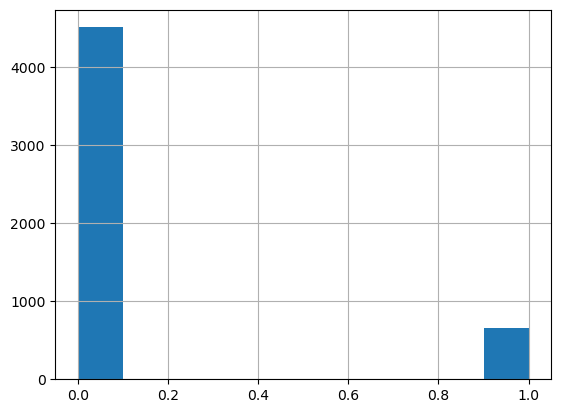

In [39]:
df['target'].hist()

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
# num char

df['num_characters'] = df['text'].apply(len)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\644470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [41]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
# word len
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\2206560576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))


In [48]:
df.sample(3)

,target,text,num_characters,num_words
2618,0,Hey pple...$700 or $900 for 5 nights...Excelle...,81,20
3882,0,Gumby's has a special where a &lt;#&gt; \ che...,96,29
3824,0,Hi. I'm always online on yahoo and would like ...,70,16


In [49]:
# word sent
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\265322240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


In [50]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences
4066,1,You are being contacted by our Dating Service ...,149,28,2
5401,0,Babes I think I got ur brolly I left it in Eng...,86,21,1
1736,0,I will come tomorrow di,23,5,1


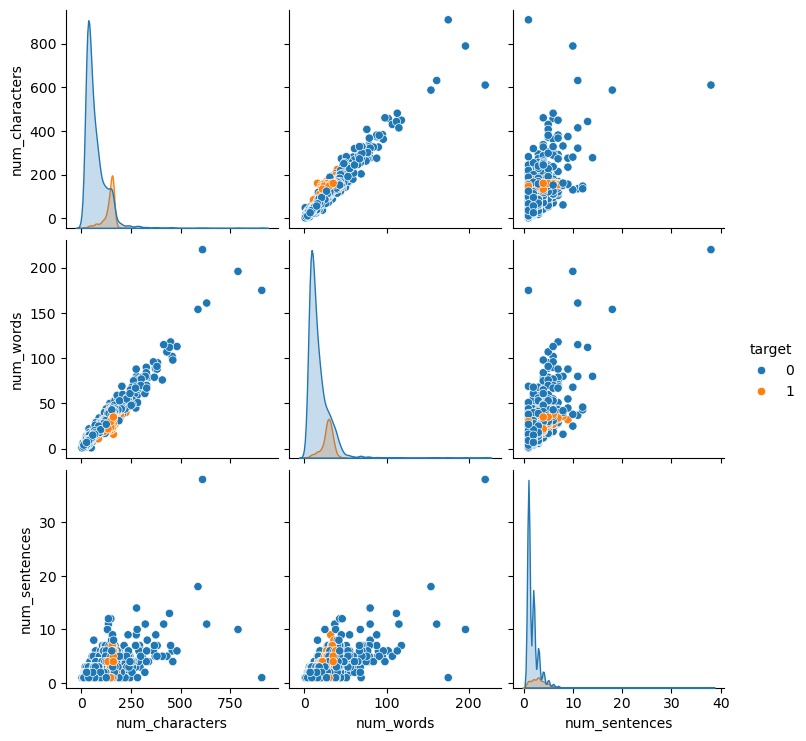

In [52]:
sns.pairplot(df, hue ='target')

<Axes: >

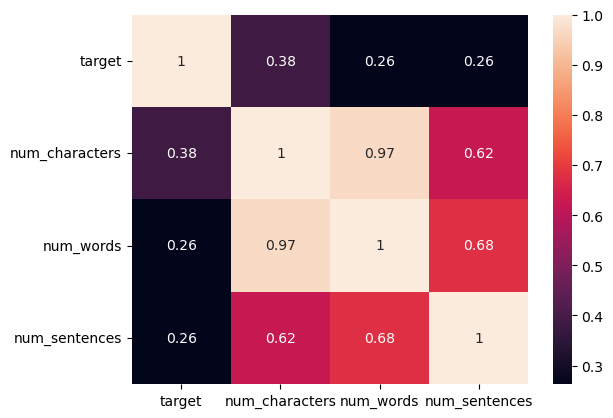

In [70]:
df_int = df.select_dtypes(include='int')

sns.heatmap(df_int.corr(), annot=True)

## Data Preprocessing

In [72]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() # stemming
ps.stem('loving')

'love'

In [85]:
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\3477644659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [86]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [81]:
!pip install wordcloud

In [87]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

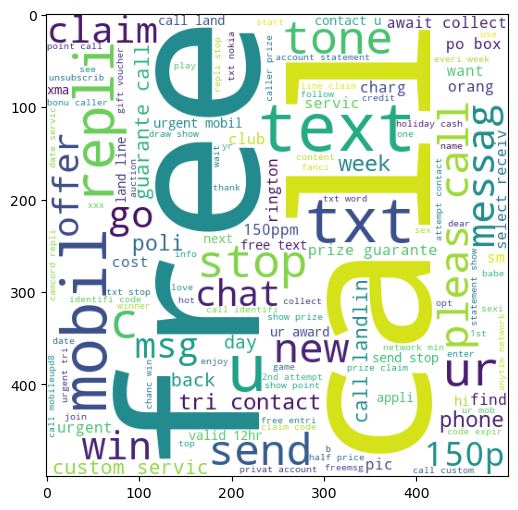

In [88]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [90]:
spam_wc_1 = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

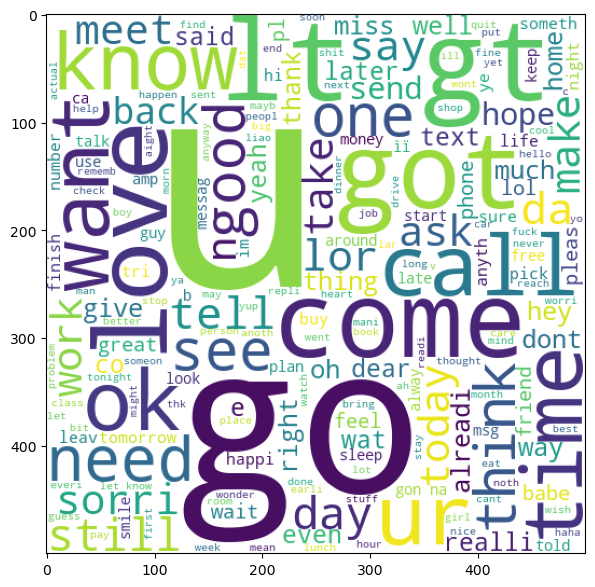

In [91]:
plt.figure(figsize=(16,7))
plt.imshow(spam_wc_1)

In [95]:
# top words

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [96]:
len(spam_corpus)

9939

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\2024025975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=most_common_df, palette='viridis')  # or 'rocket', 'coolwarm', 'magma', etc.


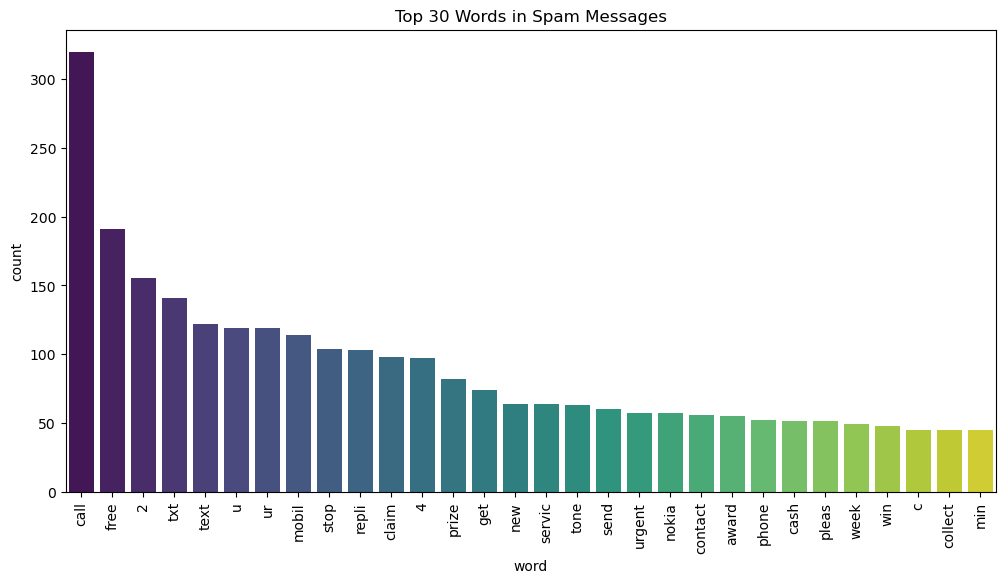

In [99]:
# Create DataFrame from top 30 most common words
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=most_common_df, palette='viridis')  # or 'rocket', 'coolwarm', 'magma', etc.
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

In [100]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\698750522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=most_common_df_1, palette='viridis')  # or 'rocket', 'coolwarm', 'magma', etc.


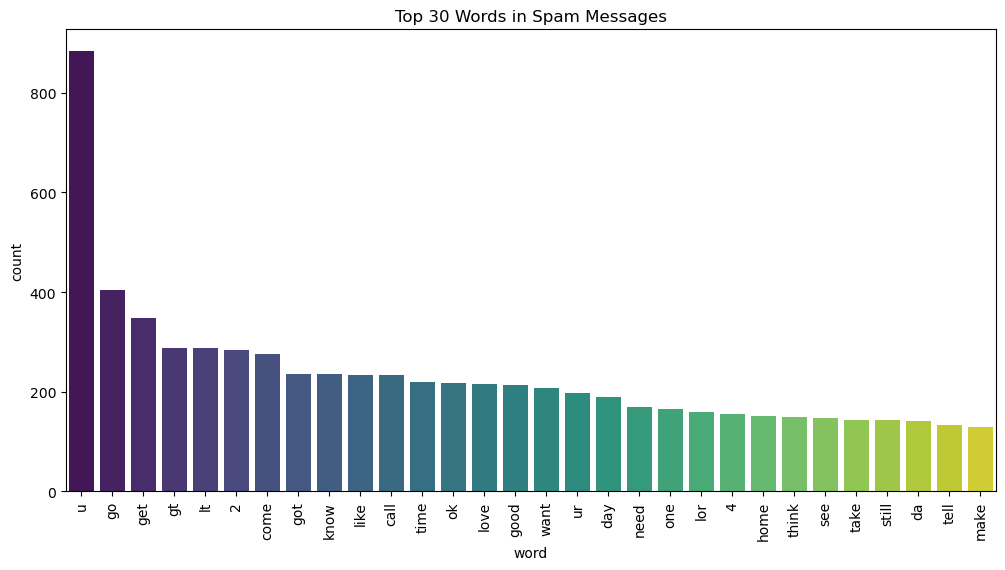

In [101]:
# Create DataFrame from top 30 most common words
most_common_df_1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=most_common_df_1, palette='viridis')  # or 'rocket', 'coolwarm', 'magma', etc.
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

## Model Building 

In [102]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [103]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
y = df['target'].values

In [109]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [112]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [115]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [116]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [118]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [120]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [121]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [122]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [123]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [124]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236


KeyboardInterrupt: 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()